In [2]:
import xlrd
import re
import json
import jieba
from collections import Counter
from zhon.hanzi import punctuation
jieba.enable_paddle()

Paddle enabled successfully......


In [3]:
people_congress = []
data1 = xlrd.open_workbook("government_report1.xlsx")
table1 = data1.sheet_by_index(1)
nrows = table1.nrows
ncols = table1.ncols
for row in range(1, nrows):
    excel_rows = []
    for col in range(ncols):
        cell_value = table1.cell(row,col).value
        excel_rows.append(cell_value)
    people_congress.append(excel_rows)
len(people_congress)
#会议文本位于people_congress[i][6]

54

党代会数据导入

In [4]:
party_congress = []
data2 = xlrd.open_workbook("party_congress.xlsx")
table2 = data2.sheet_by_index(0)
nrows = table2.nrows
ncols = table2.ncols
for row in range(1, nrows):
    excel_rows = []
    for col in range(ncols):
        cell_value = table2.cell(row,col).value
        excel_rows.append(cell_value)
    party_congress.append(excel_rows)
len(party_congress)
#会议文本位于party_congress[i][7]

160

In [5]:
punctuation_str = punctuation #导入标点符号库
stopwords = [line.strip() for line in open('stopwords.txt', 'r', encoding = 'utf-8').readlines()]
#导入停顿词库
jieba.load_userdict("dictionary.txt") #导入自定义词典（未使用，可按照词典筛选词）

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Abel\AppData\Local\Temp\jieba.cache
Loading model cost 0.820 seconds.
Prefix dict has been built successfully.


In [ ]:
#人大
people_segSentence = [] #分词结果
people_text = [] #去除符号、标点等后保留的纯文本
people_text_count = [] #对所有词进行计数后的结果
people_text_sorted = [] #计数并按词频降序排列结果
outputword_file = "people_words.json"
for year in range(len(people_congress)):
    a = people_congress[year][6]
    a = a.replace('\n','').replace('\r','').replace(' ','') #去除换行，空格
    for i in punctuation:
        a = a.replace(i,'') #去除标点符号
    people_text.append(a) #纯文本（可自行保存）
    year_word=[]
    segList = jieba.lcut(a, use_paddle = True)
    for word in segList:
        if word != '\t':
            if word not in stopwords: #去除stopwords
                year_word.append(word)
    people_segSentence.append(year_word)

In [24]:
#党代
party_segSentence = [] #分词结果
party_text = [] #去除符号、标点等候保留的纯文本
party_text_count = [] #对所有次进行计数后的结果
party_text_sorted = [] #计数并按次品降序排列结果#临时存放每年选出词
outputword_file = "people_words.json"
for year in range(len(party_congress)):
    a = party_congress[year][7]
    a = a.replace('\n','').replace('\r','').replace(' ','') #去除换行，空格
    for i in punctuation:
        a = a.replace(i,'') #去除标点符号
    party_text.append(a)
    year_word = [] #临时存放每年选出词
    segList = jieba.lcut(a, use_paddle = True) #分词
    for word in segList:
        if word != '\t':
            if word not in stopwords: #去除stopwords
                year_word.append(word)
    party_segSentence.append(year_word)

In [50]:
year = []
for i in range(len(party_congress)):
    t = str(party_congress[i][0])
    r = t.rstrip('0').strip('.')
    year.append(r)

In [66]:
party_list = list(zip(year, number, sub_number, doctype, party_text, ))

In [79]:
import pandas as pd
pd.set_option('max_colwidth',150)
data_df=pd.DataFrame(party_list, columns=['year','number','sub_number','doctype','report'])

In [191]:
data_df2.drop(columns = [level_0,index])
data_df2

NameError: name 'level_0' is not defined

In [60]:
party_congress
number = []
for i in range(len(party_congress)):
    t = str(party_congress[i][1])
    r = t.rstrip('0').strip('.')
    number.append(r)  
data_df['number'] = number

sub_number = []
for i in range(len(party_congress)):
    t = str(party_congress[i][3])
    r = t.rstrip('0').strip('.')
    sub_number.append(r)  
data_df['sub_number'] = sub_number

doctype = []
for i in range(len(party_congress)):
    t = str(party_congress[i][5])
    r = t.rstrip('0').strip('.')
    doctype.append(r)  
data_df['type'] = type


In [65]:
doctype = []
for i in range(len(party_congress)):
    t = str(party_congress[i][5])
    r = t.rstrip('0').strip('.')
    doctype.append(r)

In [114]:
def jiebait(text):
    jieba.load_userdict("dictionary.txt") #导入自定义词典（未使用，可按照词典筛选词）
    seglist = jieba.cut(text, cut_all = False)
    filter_seglist = [fil for fil in seglist if len(fil) >= 2]
    year_word = []
    for word in filter_seglist:
        if word !='\t':
            if word not in stopwords:
                year_word = ['  '.join(word)]
    return year_word

In [221]:
all_list = ['  '.join(jieba.cut(data_df2['report'][36]))]

In [222]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words=stopwords)
x_count = count_vec.fit_transform(all_list)
data_dtm = pd.DataFrame(x_count.toarray(),columns=count_vec.get_feature_names())
data_dtm

,164,199,一中,一体,一国两制,一场,一审,一律,一手,一批,...,高标准,高校,高水平,高端,高素质,高级人民法院,高级干部,鲜明,黄赌毒,齐抓共管
0,1,1,1,3,3,2,1,1,2,1,...,1,2,1,1,3,1,1,1,1,1


In [193]:
data_df2 = data_df2.reset_index()
data_df2

,index,year,report
0,1,1977,中国共产党第十一次全国代表大会于一九七七年八月十二日至十八日在北京隆重举行英明领袖华国锋主席主持了大会这次大会是在我们的伟大领袖和导师毛泽东主席逝世以后在我们党取得粉碎王洪文张春桥江青姚文元四人帮反党集团的伟大胜利的情况下召开的这次大会是高举毛主席的伟大旗帜坚持毛主席无产阶级革命路线的大会是...
1,2,1978,中国共产党第十一届中央委员会第二次全体会议于一九七八年二月十八日至二十三日在北京举行中国共产党中央委员会主席华国锋同志主持了这次会议中共中央副主席叶剑英邓小平李先念汪东兴同志中央政治局其他同志中央委员和候补中央委员出席了会议这次中央全会的任务是从政治上思想上和组织上为第五届全国人民代表大会和...
2,3,1979,中国共产党第十一届中央委员会第四次全体会议于一九七九年九月二十五日至二十八日在北京举行出席这次会议的中央委员一百八十九人候补中央委员一百一十八人中国共产党中央委员会主席华国锋副主席叶剑英邓小平李先念陈云汪东兴中央政治局其他同志出席了会议另有十六名中央机关和地方党委的负责同志列席了会议华国锋同...
3,4,1980,中国共产党第十一届中央委员会第五次全体会议一九八○年二月二十三日至二十九日在北京召开到会中央委员二百零一人候补中央委员一百一十八人另有各地方各部门负责同志三十七人列席会议中国共产党中央委员会主席华国锋副主席叶剑英邓小平李先念陈云出席会议并作了重要讲话会议由华国锋同志主持五中全会的大部分议程是...
4,5,1981,建国以前二十八年历史的回顾１中国共产党自从一九二一年成立以来已经走过六十年的光辉战斗历程为了总结党在建国以来三十二年的经验有必要简略地回顾一下建国以前二十八年党领导人民进行的新民主主义革命斗争２中国共产党是马克思列宁主义同中国工人运动相结合的产物是在俄国十月革命和我国五四运动的影响下在列宁领...
5,6,1982,同志们我们第十一届中央委员会一共开了七次全会我们这一届中央委员会的历史任务可以说是胜利地完成了五年前党的第十一次全国代表大会的代表同志们把我们这些人推上了中国历史活动的前台五年以来中国历史的发展同我们这个领导集体的工作和活动是密切地联系在一起的我们在这段时间的功过是非已经载入了党和国家的历史...
6,7,1983,中国共产党第十二届中央委员会第二次全体会议通过了中共中央关于整党的决定全党同志和全国人民瞩目以待的全面整党将遵循这个决定于今年冬季开始用三年时间在全党范围进行完毕这是中国共产党在新的历史时期为夺取新的伟大胜利所采取的一个重大步骤是实现党的十二大确定的到本世纪末全国工农业年总产值翻两番的宏伟目...
7,8,1984,中国共产党在１９７８年１２月召开了十一届三中全会取得了巨大的成功相隔五年零十个月之后召开了十二届三中全会通过了中共中央关于经济体制改革的决定和中国共产党第十二届中央委员会第三次全体会议关于召开党的全国代表会议的决定开得也很成功实践将证明这次三中全会同上次三中全会一样也是我们党的历史上具有重要...
8,9,1986,中国共产党第十二届中央委员会第六次全体会议根据党的第十二次全国代表大会关于在建设物质文明的同时努力建设社会主义精神文明的战略决策以及１９８５年党的全国代表会议的精神根据我国全面改革发展的要求回顾和讨论了几年来精神文明建设的成就和面临的问题全会认为适应新的形势进一步明确社会主义精神文明建设的指...
9,10,1987,这里我想着重谈一下党政分开的问题因为这是政治体制改革的首要关键这次全会审议的文件中十三大报告有这个内容政治体制改革总体设想也有这个内容政治体制改革首先是领导体制改革党政不分以党代政这个问题不解决整个政治体制改革都无从展开在全会讨论两个文件之前我想作几点说明现在许多社会主义国家都在讲政治体制改...


In [192]:
def ab(data_df):
    return','.join(data_df.values)

data_df2= data_df.groupby(['year'])['report'].apply(ab)
data_df2 = data_df2.reset_index()
data_df2 = data_df2.drop(0)
data_df2

,year,report
1,1977,中国共产党第十一次全国代表大会于一九七七年八月十二日至十八日在北京隆重举行英明领袖华国锋主席主持了大会这次大会是在我们的伟大领袖和导师毛泽东主席逝世以后在我们党取得粉碎王洪文张春桥江青姚文元四人帮反党集团的伟大胜利的情况下召开的这次大会是高举毛主席的伟大旗帜坚持毛主席无产阶级革命路线的大会是...
2,1978,中国共产党第十一届中央委员会第二次全体会议于一九七八年二月十八日至二十三日在北京举行中国共产党中央委员会主席华国锋同志主持了这次会议中共中央副主席叶剑英邓小平李先念汪东兴同志中央政治局其他同志中央委员和候补中央委员出席了会议这次中央全会的任务是从政治上思想上和组织上为第五届全国人民代表大会和...
3,1979,中国共产党第十一届中央委员会第四次全体会议于一九七九年九月二十五日至二十八日在北京举行出席这次会议的中央委员一百八十九人候补中央委员一百一十八人中国共产党中央委员会主席华国锋副主席叶剑英邓小平李先念陈云汪东兴中央政治局其他同志出席了会议另有十六名中央机关和地方党委的负责同志列席了会议华国锋同...
4,1980,中国共产党第十一届中央委员会第五次全体会议一九八○年二月二十三日至二十九日在北京召开到会中央委员二百零一人候补中央委员一百一十八人另有各地方各部门负责同志三十七人列席会议中国共产党中央委员会主席华国锋副主席叶剑英邓小平李先念陈云出席会议并作了重要讲话会议由华国锋同志主持五中全会的大部分议程是...
5,1981,建国以前二十八年历史的回顾１中国共产党自从一九二一年成立以来已经走过六十年的光辉战斗历程为了总结党在建国以来三十二年的经验有必要简略地回顾一下建国以前二十八年党领导人民进行的新民主主义革命斗争２中国共产党是马克思列宁主义同中国工人运动相结合的产物是在俄国十月革命和我国五四运动的影响下在列宁领...
6,1982,同志们我们第十一届中央委员会一共开了七次全会我们这一届中央委员会的历史任务可以说是胜利地完成了五年前党的第十一次全国代表大会的代表同志们把我们这些人推上了中国历史活动的前台五年以来中国历史的发展同我们这个领导集体的工作和活动是密切地联系在一起的我们在这段时间的功过是非已经载入了党和国家的历史...
7,1983,中国共产党第十二届中央委员会第二次全体会议通过了中共中央关于整党的决定全党同志和全国人民瞩目以待的全面整党将遵循这个决定于今年冬季开始用三年时间在全党范围进行完毕这是中国共产党在新的历史时期为夺取新的伟大胜利所采取的一个重大步骤是实现党的十二大确定的到本世纪末全国工农业年总产值翻两番的宏伟目...
8,1984,中国共产党在１９７８年１２月召开了十一届三中全会取得了巨大的成功相隔五年零十个月之后召开了十二届三中全会通过了中共中央关于经济体制改革的决定和中国共产党第十二届中央委员会第三次全体会议关于召开党的全国代表会议的决定开得也很成功实践将证明这次三中全会同上次三中全会一样也是我们党的历史上具有重要...
9,1986,中国共产党第十二届中央委员会第六次全体会议根据党的第十二次全国代表大会关于在建设物质文明的同时努力建设社会主义精神文明的战略决策以及１９８５年党的全国代表会议的精神根据我国全面改革发展的要求回顾和讨论了几年来精神文明建设的成就和面临的问题全会认为适应新的形势进一步明确社会主义精神文明建设的指...
10,1987,这里我想着重谈一下党政分开的问题因为这是政治体制改革的首要关键这次全会审议的文件中十三大报告有这个内容政治体制改革总体设想也有这个内容政治体制改革首先是领导体制改革党政不分以党代政这个问题不解决整个政治体制改革都无从展开在全会讨论两个文件之前我想作几点说明现在许多社会主义国家都在讲政治体制改...


In [200]:
data_df2

,index,year,report
0,1,1977,中国共产党第十一次全国代表大会于一九七七年八月十二日至十八日在北京隆重举行英明领袖华国锋主席主持了大会这次大会是在我们的伟大领袖和导师毛泽东主席逝世以后在我们党取得粉碎王洪文张春桥江青姚文元四人帮反党集团的伟大胜利的情况下召开的这次大会是高举毛主席的伟大旗帜坚持毛主席无产阶级革命路线的大会是...
1,2,1978,中国共产党第十一届中央委员会第二次全体会议于一九七八年二月十八日至二十三日在北京举行中国共产党中央委员会主席华国锋同志主持了这次会议中共中央副主席叶剑英邓小平李先念汪东兴同志中央政治局其他同志中央委员和候补中央委员出席了会议这次中央全会的任务是从政治上思想上和组织上为第五届全国人民代表大会和...
2,3,1979,中国共产党第十一届中央委员会第四次全体会议于一九七九年九月二十五日至二十八日在北京举行出席这次会议的中央委员一百八十九人候补中央委员一百一十八人中国共产党中央委员会主席华国锋副主席叶剑英邓小平李先念陈云汪东兴中央政治局其他同志出席了会议另有十六名中央机关和地方党委的负责同志列席了会议华国锋同...
3,4,1980,中国共产党第十一届中央委员会第五次全体会议一九八○年二月二十三日至二十九日在北京召开到会中央委员二百零一人候补中央委员一百一十八人另有各地方各部门负责同志三十七人列席会议中国共产党中央委员会主席华国锋副主席叶剑英邓小平李先念陈云出席会议并作了重要讲话会议由华国锋同志主持五中全会的大部分议程是...
4,5,1981,建国以前二十八年历史的回顾１中国共产党自从一九二一年成立以来已经走过六十年的光辉战斗历程为了总结党在建国以来三十二年的经验有必要简略地回顾一下建国以前二十八年党领导人民进行的新民主主义革命斗争２中国共产党是马克思列宁主义同中国工人运动相结合的产物是在俄国十月革命和我国五四运动的影响下在列宁领...
5,6,1982,同志们我们第十一届中央委员会一共开了七次全会我们这一届中央委员会的历史任务可以说是胜利地完成了五年前党的第十一次全国代表大会的代表同志们把我们这些人推上了中国历史活动的前台五年以来中国历史的发展同我们这个领导集体的工作和活动是密切地联系在一起的我们在这段时间的功过是非已经载入了党和国家的历史...
6,7,1983,中国共产党第十二届中央委员会第二次全体会议通过了中共中央关于整党的决定全党同志和全国人民瞩目以待的全面整党将遵循这个决定于今年冬季开始用三年时间在全党范围进行完毕这是中国共产党在新的历史时期为夺取新的伟大胜利所采取的一个重大步骤是实现党的十二大确定的到本世纪末全国工农业年总产值翻两番的宏伟目...
7,8,1984,中国共产党在１９７８年１２月召开了十一届三中全会取得了巨大的成功相隔五年零十个月之后召开了十二届三中全会通过了中共中央关于经济体制改革的决定和中国共产党第十二届中央委员会第三次全体会议关于召开党的全国代表会议的决定开得也很成功实践将证明这次三中全会同上次三中全会一样也是我们党的历史上具有重要...
8,9,1986,中国共产党第十二届中央委员会第六次全体会议根据党的第十二次全国代表大会关于在建设物质文明的同时努力建设社会主义精神文明的战略决策以及１９８５年党的全国代表会议的精神根据我国全面改革发展的要求回顾和讨论了几年来精神文明建设的成就和面临的问题全会认为适应新的形势进一步明确社会主义精神文明建设的指...
9,10,1987,这里我想着重谈一下党政分开的问题因为这是政治体制改革的首要关键这次全会审议的文件中十三大报告有这个内容政治体制改革总体设想也有这个内容政治体制改革首先是领导体制改革党政不分以党代政这个问题不解决整个政治体制改革都无从展开在全会讨论两个文件之前我想作几点说明现在许多社会主义国家都在讲政治体制改...


In [161]:
report = []
for i in range(len(data_df2)):
    all_list = ['  '.join(jieba.cut(data_df2['report'][i+1]))]
    report.append(all_list)

43

In [218]:
data_df2['report'][36]

'中共中央关于全面推进依法治国若干重大问题的决定2014年10月23日中国共产党第十八届中央委员会第四次全体会议通过新华社北京10月28日电为贯彻落实党的十八大作出的战略部署加快建设社会主义法治国家十八届中央委员会第四次全体会议研究了全面推进依法治国若干重大问题作出如下决定一坚持走中国特色社会主义法治道路建设中国特色社会主义法治体系依法治国是坚持和发展中国特色社会主义的本质要求和重要保障是实现国家治理体系和治理能力现代化的必然要求事关我们党执政兴国事关人民幸福安康事关党和国家长治久安全面建成小康社会实现中华民族伟大复兴的中国梦全面深化改革完善和发展中国特色社会主义制度提高党的执政能力和执政水平必须全面推进依法治国我国正处于社会主义初级阶段全面建成小康社会进入决定性阶段改革进入攻坚期和深水区国际形势复杂多变我们党面对的改革发展稳定任务之重前所未有矛盾风险挑战之多前所未有依法治国在党和国家工作全局中的地位更加突出作用更加重大面对新形势新任务我们党要更好统筹国内国际两个大局更好维护和运用我国发展的重要战略机遇期更好统筹社会力量平衡社会利益调节社会关系规范社会行为使我国社会在深刻变革中既生机勃勃又井然有序实现经济发展政治清明文化昌盛社会公正生态良好实现我国和平发展的战略目标必须更好发挥法治的引领和规范作用我们党高度重视法治建设长期以来特别是党的十一届三中全会以来我们党深刻总结我国社会主义法治建设的成功经验和深刻教训提出为了保障人民民主必须加强法治必须使民主制度化法律化把依法治国确定为党领导人民治理国家的基本方略把依法执政确定为党治国理政的基本方式积极建设社会主义法治取得历史性成就目前中国特色社会主义法律体系已经形成法治政府建设稳步推进司法体制不断完善全社会法治观念明显增强同时必须清醒看到同党和国家事业发展要求相比同人民群众期待相比同推进国家治理体系和治理能力现代化目标相比法治建设还存在许多不适应不符合的问题主要表现为有的法律法规未能全面反映客观规律和人民意愿针对性可操作性不强立法工作中部门化倾向争权诿责现象较为突出有法不依执法不严违法不究现象比较严重执法体制权责脱节多头执法选择性执法现象仍然存在执法司法不规范不严格不透明不文明现象较为突出群众对执法司法不公和腐败问题反映强烈部分社会成员尊法信法守法用法依法维权意识不强一些国家工作人员特别是领导干部依法办事观念不强能力不足知法

In [219]:
data_final['2014']

['中共中央  关于  全面  推进  依法治国  若干  重大  问题  的  决定  2014  年  10  月  23  日  中国共产党  第十八届  中央委员会  第四次  全体会议  通过  新华社  北京  10  月  28  日电  为  贯彻落实  党的十八大  作出  的  战略部署  加快  建设  社会主义  法治  国家  十八  届  中央委员会  第四次  全体会议  研究  了  全面  推进  依法治国  若干  重大  问题  作出  如下  决定  一  坚持  走  中国特色社会主义  法治  道路  建设  中国特色社会主义  法治  体系  依法治国  是  坚持  和  发展  中国特色社会主义  的  本质  要求  和  重要  保障  是  实现  国家  治理  体系  和  治理  能力  现代化  的  必然  要求  事关  我们  党执政  兴国  事关  人民幸福  安康  事关  党和国家  长治久安  全面建成小康社会  实现中华民族伟大复兴  的  中国梦  全面深化改革  完善  和  发展  中国特色社会主义  制度  提高  党  的  执政  能力  和  执政  水平  必须  全面  推进  依法治国  我国  正  处于  社会主义初级阶段  全面建成小康社会  进入  决定性  阶段  改革  进入  攻坚  期  和  深水  区  国际形势  复杂多变  我们  党  面对  的  改革发展稳定  任务  之重  前所未有  矛盾  风险  挑战  之多  前所未有  依法治国  在  党和国家  工作  全局  中  的  地位  更加  突出  作用  更加  重大  面对  新形势  新  任务  我们  党要  更好  统筹  国内  国际  两个  大局  更好  维护  和  运用  我国  发展  的  重要战略机遇期  更好  统筹  社会  力量  平衡  社会  利益  调节  社会关系  规范  社会  行为  使  我国  社会  在  深刻变革  中  既  生机勃勃  又  井然有序  实现  经济  发展  政治  清明  文化  昌盛  社会  公正  生态  良好  实现  我国  和平  发展  的  战略目标  必须  更好  发挥  

In [205]:
data_final = dict(zip(data_df2['year'],report))
data_final_df = pd.DataFrame.from_dict(data_final).transpose()
data_final_df.columns = ['report']
data_final_df

,report
1977,中国共产党 第十一次 全国代表大会 于 一九七七年 八月 十二日 至 十八日 在 北京 隆重举行 英明领袖 华国锋 主席 主持 了 大会 这次 大会 是 在 我们 的 伟大领袖 和 导师 毛泽东 主席 逝世 以后 在 我们 党...
1978,中国共产党 第十一届 中央委员会 第二次 全体会议 于 一九七八年 二月 十八日 至 二十三日 在 北京 举行 中国共产党中央委员会 主席 华国锋 同志 主持 了 这次 会议 中共中央 副 主席 叶剑英 邓小平 李先念 汪东兴 同志 ...
1979,中国共产党 第十一届 中央委员会 第四次 全体会议 于 一九七九年 九月 二十五日 至 二十八日 在 北京 举行 出席 这次 会议 的 中央委员 一百八十九 人 候补 中央委员 一百一十 八人 中国共产党中央委员会 主席 华国锋 副 ...
1980,中国共产党 第十一届 中央委员会 第五次 全体会议 一九八 ○ 年 二月 二十三日 至 二十九日 在 北京 召开 到 会 中央委员 二百 零一人 候补 中央委员 一百一十 八人 另 有 各 地方 各 部门 负责同志 三十七 人 ...
1981,建国 以前 二十八年 历史 的 回顾 １ 中国共产党 自从 一九二 一年 成立 以来 已经 走过 六十年 的 光辉 战斗历程 为了 总结 党 在 建国以来 三十二年 的 经验 有 必要 简略 地 回顾 一下 建国 以前 二...
1982,同志 们 我们 第十一届 中央委员会 一共 开 了 七次 全会 我们 这 一届 中央委员会 的 历史 任务 可以 说 是 胜利 地 完成 了 五年 前党 的 第十一次 全国代表大会 的 代表 同志 们 把 我们 这些 人...
1983,中国共产党 第十二届 中央委员会 第二次 全体会议 通过 了 中共中央 关于 整党 的 决定 全党同志 和 全国 人民 瞩目 以待 的 全面 整党 将 遵循 这个 决定 于 今年 冬季 开始 用 三年 时间 在 全党 范围 ...
1984,中国共产党 在 １ ９ ７ ８ 年 １ ２ 月 召开 了 十一届三中全会 取得 了 巨大 的 成功 相隔 五年 零 十个月 之后 召开 了 十二届 三中全会 通过 了 中共中央 关于 经济体制改革 的 决定 和 中国共产党...
1986,中国共产党 第十二届 中央委员会 第六次 全体会议 根据 党 的 第十二次 全国代表大会 关于 在 建设 物质文明 的 同时 努力 建设社会主义精神文明 的 战略决策 以及 １ ９ ８ ５ 年 党 的 全国 代表 会议 的 精神...
1987,这里 我 想 着重 谈 一下 党政 分开 的 问题 因为 这是 政治体制 改革 的 首要 关键 这次 全会 审议 的 文件 中 十三大 报告 有 这个 内容 政治体制 改革 总体 设想 也 有 这个 内容 政治体制 改...


In [211]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words=stopwords)
x_count = count_vec.fit_transform(data_final_df.report)
data_dtm = pd.DataFrame(x_count.toarray(),columns=count_vec.get_feature_names())
data_dtm.index = data_final_df.index
data_dtm

,123,133,139,141,144,151,152,156,163,164,...,齐发,齐宣王,齐心,齐心协力,齐心合力,齐抓共管,齐集,龙头,龙头企业,龙州
1977,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
1979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [220]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words=stopwords)
x_count = count_vec.fit_transform(data_final_df.report)
data_dtm = pd.DataFrame(x_count.toarray(),columns=count_vec.get_feature_names())
data_dtm.index = data_final_df.index
data_dtm

,10,11,12,123,13,133,139,14,141,144,...,齐发,齐宣王,齐心,齐心协力,齐心合力,齐抓共管,齐集,龙头,龙头企业,龙州
1977,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
1979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [215]:
data_df

,year,number,sub_number,doctype,report
0,1977,11,0,Communique,中国共产党第十一次全国代表大会于一九七七年八月十二日至十八日在北京隆重举行英明领袖华国锋主席主持了大会这次大会是在我们的伟大领袖和导师毛泽东主席逝世以后在我们党取得粉碎王洪文张春桥江青姚文元四人帮反党集团的伟大胜利的情况下召开的这次大会是高举毛主席的伟大旗帜坚持毛主席无产阶级革命路线的大会是...
1,1977,11,0,Address,同志们中国共产党第十一次全国代表大会现在开幕了首先我提议为悼念去年逝世的我们党我们军队和我们人民共和国的缔造者我国无产阶级和各族人民的伟大领袖和导师毛泽东主席为悼念去年逝世的我国人民伟大的无产阶级革命家毛主席的久经考验的亲密战友我们敬爱的周恩来总理朱德委员长为悼念十大以来和以前几年间逝世的为...
2,1977,11,0,Address,同志们现在我受党中央委托做关于修改党章的报告党的第十一次全国代表大会是在我们的伟大领袖和导师毛泽东主席逝世以后在我们党取得粉碎王洪文张春桥江青姚文元四人帮反党集团的伟大胜利的情况下由英明领袖华国锋主席主持召开的这是我们党的历史上一次具有伟大意义和深远影响的大会华主席在大会上所作的政治报告高举...
3,1977,11,0,Editorial,具有伟大历史意义的中国共产党第十一次全国代表大会胜利闭幕了全党全军全国各族人民喜气洋洋热烈欢呼十一大和一中全会取得圆满成功欢呼华国锋同志当选党的主席欢呼新的中央委员会和政治局诞生坚决拥护华主席的政治报告拥护叶副主席关于修改党章的报告和新党章十一大是我党历史上一个伟大的里程碑这次代表大会是在伟...
4,1977,11,0,Address,同志们我们这次代表大会在英明领袖华国锋同志主持下在以华主席为首的大会主席团的正确领导下经过全体代表的共同努力一致通过了华主席的政治报告一致通过了新党章和叶副主席关于修改党章的报告选出了新的中央委员会圆满地完成了我们的庄严任务我们这次代表大会是坚持毛主席无产阶级革命路线的大会是坚持马克思主义坚...
5,1978,11,2,Communique,中国共产党第十一届中央委员会第二次全体会议于一九七八年二月十八日至二十三日在北京举行中国共产党中央委员会主席华国锋同志主持了这次会议中共中央副主席叶剑英邓小平李先念汪东兴同志中央政治局其他同志中央委员和候补中央委员出席了会议这次中央全会的任务是从政治上思想上和组织上为第五届全国人民代表大会和...
6,1978,11,3,Communique,中国共产党第十一届中央委员会第三次全体会议于一九七八年十二月十八日至二十二日在北京举行出席会议的中央委员一百六十九人候补中央委员一百一十二人中国共产党中央委员会主席华国锋副主席叶剑英邓小平李先念陈云汪东兴出席了会议华国锋同志主持了这次会议并作了重要讲话在全会前召开了中央工作会议为全会作了充分...
7,1978,11,3,Editorial,党的十一届三中全会十分明确地确立了党的政治路线和思想路线有了正确的政治路线和思想路线还必须有正确的组织路线来保证毛泽东同志说过政治路线确定之后干部就是决定的因素当前组织路线中最重要最迫切的问题就是注意培养和选拔好各级领导班子的接班人这次党的五中全会调整充实了党中央领导机构增选中央政治局常委成...
8,1978,11,3,Editorial,随着揭批林彪四人帮斗争取得伟大的胜利十一届三中全会决定全党全国工作的着重点应该从明年起转移到社会主义现代化建设上来为了适应这个历史性的转变我们必须重新学习伟大的转变把全党全国工作的着重点转移到现代化建设上来这是华国锋同志为首的党中央根据毛泽东同志生前教导和新时期总任务所作出的重大决策是实现毛...
9,1979,11,4,Communique,中国共产党第十一届中央委员会第四次全体会议于一九七九年九月二十五日至二十八日在北京举行出席这次会议的中央委员一百八十九人候补中央委员一百一十八人中国共产党中央委员会主席华国锋副主席叶剑英邓小平李先念陈云汪东兴中央政治局其他同志出席了会议另有十六名中央机关和地方党委的负责同志列席了会议华国锋同...


In [225]:
report = []
for i in range(len(data_df2)):
    all_list = ['  '.join(jieba.cut(data_df2['report'][i],cut_all = False))]
    report.append(all_list)
data_final = dict(zip(data_df2['year'],report))
data_final_df = pd.DataFrame.from_dict(data_final).transpose()
data_final_df.columns = ['report']
data_final_df

,report
1977,中国共产党 第十一次 全国代表大会 于 一九七七年 八月 十二日 至 十八日 在 北京 隆重举行 英明领袖 华国锋 主席 主持 了 大会 这次 大会 是 在 我们 的 伟大领袖 和 导师 毛泽东 主席 逝世 以后 在 我们 党...
1978,中国共产党 第十一届 中央委员会 第二次 全体会议 于 一九七八年 二月 十八日 至 二十三日 在 北京 举行 中国共产党中央委员会 主席 华国锋 同志 主持 了 这次 会议 中共中央 副 主席 叶剑英 邓小平 李先念 汪东兴 同志 ...
1979,中国共产党 第十一届 中央委员会 第四次 全体会议 于 一九七九年 九月 二十五日 至 二十八日 在 北京 举行 出席 这次 会议 的 中央委员 一百八十九 人 候补 中央委员 一百一十 八人 中国共产党中央委员会 主席 华国锋 副 ...
1980,中国共产党 第十一届 中央委员会 第五次 全体会议 一九八 ○ 年 二月 二十三日 至 二十九日 在 北京 召开 到 会 中央委员 二百 零一人 候补 中央委员 一百一十 八人 另 有 各 地方 各 部门 负责同志 三十七 人 ...
1981,建国 以前 二十八年 历史 的 回顾 １ 中国共产党 自从 一九二 一年 成立 以来 已经 走过 六十年 的 光辉 战斗历程 为了 总结 党 在 建国以来 三十二年 的 经验 有 必要 简略 地 回顾 一下 建国 以前 二...
1982,同志 们 我们 第十一届 中央委员会 一共 开 了 七次 全会 我们 这 一届 中央委员会 的 历史 任务 可以 说 是 胜利 地 完成 了 五年 前党 的 第十一次 全国代表大会 的 代表 同志 们 把 我们 这些 人...
1983,中国共产党 第十二届 中央委员会 第二次 全体会议 通过 了 中共中央 关于 整党 的 决定 全党同志 和 全国 人民 瞩目 以待 的 全面 整党 将 遵循 这个 决定 于 今年 冬季 开始 用 三年 时间 在 全党 范围 ...
1984,中国共产党 在 １ ９ ７ ８ 年 １ ２ 月 召开 了 十一届三中全会 取得 了 巨大 的 成功 相隔 五年 零 十个月 之后 召开 了 十二届 三中全会 通过 了 中共中央 关于 经济体制改革 的 决定 和 中国共产党...
1986,中国共产党 第十二届 中央委员会 第六次 全体会议 根据 党 的 第十二次 全国代表大会 关于 在 建设 物质文明 的 同时 努力 建设社会主义精神文明 的 战略决策 以及 １ ９ ８ ５ 年 党 的 全国 代表 会议 的 精神...
1987,这里 我 想 着重 谈 一下 党政 分开 的 问题 因为 这是 政治体制 改革 的 首要 关键 这次 全会 审议 的 文件 中 十三大 报告 有 这个 内容 政治体制 改革 总体 设想 也 有 这个 内容 政治体制 改...


In [250]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words=stopwords,min_df=2)
x_count = count_vec.fit_transform(data_final_df.report)
data_dtm = pd.DataFrame(x_count.toarray(),columns=count_vec.get_feature_names())
data_dtm.index = data_final_df.index
data_dtm

,152,190,1982,199,2004,2006,2007,202,2035,一下子,...,鼓吹,鼓舞,鼓舞人心,鼓舞斗志,鼓起,鼓足干劲,齐心协力,齐抓共管,龙头,龙头企业
1977,0,0,0,0,0,0,0,0,0,0,...,4,3,0,0,0,1,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1979,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0
1980,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1981,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0
1982,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,0,1,0


In [ ]:
data_df.to_pickle("./pickle/corpus.pkl") #没有清洗的元数据
data_clean.to_pickle('./pickle/data_clean.pkl') #
pickle.dump(cv, open("./pickle/cv.pkl", "wb"))

In [275]:
people_congress = pd.DataFrame(people_congress)
people_congress.to_pickle("./people_congress.pkl")#没有清洗的元数据

data_df2.to_pickle("./data_df2.pkl")#清洗后的数据

data_final_df.to_pickle("./data_final.pkl") #分词后的数据

data_dtm.to_pickle("./dtm.pkl") #documenttermmatrix数据

In [251]:
data = pd.read_pickle('./dtm.pkl')
data = data.transpose()
data.head()

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(100)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'1977': [('毛主席', 316),
  ('无产阶级', 198),
  ('革命', 156),
  ('四人帮', 155),
  ('主席', 104),
  ('斗争', 86),
  ('资产阶级', 85),
  ('同志', 82),
  ('专政', 79),
  ('领导', 72),
  ('我国', 72),
  ('路线', 70),
  ('胜利', 68),
  ('团结', 66),
  ('走资派', 64),
  ('理论', 61),
  ('反对', 59),
  ('党内', 59),
  ('历史', 54),
  ('干部', 49),
  ('大会', 47),
  ('党章', 47),
  ('国家', 47),
  ('党员', 46),
  ('发展', 44),
  ('指出', 42),
  ('资本主义', 42),
  ('原则', 41),
  ('政治', 41),
  ('全国', 40),
  ('帝国主义', 39),
  ('马克思主义', 37),
  ('反革命', 36),
  ('路线斗争', 35),
  ('文化大革命', 35),
  ('思想', 35),
  ('修正主义', 33),
  ('提出', 32),
  ('党中央', 31),
  ('粉碎', 31),
  ('伟大旗帜', 30),
  ('第十一次', 30),
  ('群众', 29),
  ('报告', 29),
  ('作风', 28),
  ('时期', 28),
  ('阶级', 27),
  ('高举', 27),
  ('修改草案', 27),
  ('破坏', 27),
  ('社会', 27),
  ('各族人民', 26),
  ('中国', 25),
  ('全党全军', 25),
  ('国际', 25),
  ('批评', 24),
  ('优良传统', 24),
  ('民主派', 24),
  ('世界', 23),
  ('复辟', 23),
  ('代表', 23),
  ('民主', 23),
  ('道路', 22),
  ('华国锋', 22),
  ('经验', 22),
  ('发扬', 22),
  ('十大', 21),
  ('军队', 21)

In [234]:
for year, top_words in top_dict.items():
    print(year)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

1977
毛主席, 无产阶级, 革命, 四人帮, 主席, 斗争, 资产阶级, 同志, 专政, 领导, 我国, 路线, 胜利, 团结
---
1978
同志, 会议, 全会, 现代化, 毛泽东, 四人帮, 全国, 发展, 我国, 历史, 领导, 经济, 四个, 接班人
---
1979
农业, 发展, 我国, 同志, 全会, 农民, 农村, 全国, 政策, 四人帮, 极左, 讨论, 加快, 现代化
---
1980
同志, 刘少奇, 五中全会, 全会, 讨论, 全国, 发展, 党中央, 全党, 平反, 党的领导, 领导, 决议, 准则
---
1981
同志, 发展, 毛泽东, 中国, 革命, 历史, 文化大革命, 领导, 经济, 全国, 国家, 我国, 斗争, 提出
---
1982
同志, 经济, 发展, 我国, 历史, 十二大, 国家, 全国, 代表大会, 事业, 企业, 领导, 社会主义现代化, 提高
---
1983
整党, 党员, 组织, 思想, 党组织, 领导, 中央, 历史, 党内, 斗争, 整顿, 群众, 登记, 政治
---
1984
企业, 改革, 经济, 发展, 城市, 我国, 国家, 经济体制, 计划, 社会, 管理, 农村, 经济体制改革, 实行
---
1986
精神文明, 发展, 社会, 马克思主义, 科学, 我国, 改革, 文化, 历史, 精神, 思想, 教育, 社会主义现代化, 民主
---
1987
发展, 改革, 经济, 我国, 领导, 国家, 社会, 企业, 同志, 基础, 改革开放, 历史, 条件, 现代化
---
1988
思想, 政治, 企业, 改革, 经济, 职工, 治理, 环境, 整顿, 国家, 经济秩序, 发展, 全会, 社会
---
1989
同志, 全会, 邓小平, 经济, 发展, 治理整顿, 领导, 群众, 中央, 我国, 提出, 稳定, 干部, 党和国家
---
1990
群众, 发展, 领导, 干部, 经济, 全会, 我国, 监督, 决策, 教育, 人民群众, 党组织, 中央, 情况
---
1991
农村, 农业, 发展, 全会, 改革, 经济, 我国, 农民, 政策, 社会, 进一步, 稳定, 基础, 各项
---
1992
发展, 经济, 改革开放, 领导, 我国, 同志, 中国, 改革, 现代化,

In [252]:
from collections import Counter
# Let's first pull out the top 30 words for each comedian
words = []
for year in data.columns:
    top = [word for (word, count) in top_dict[year]]
    for t in top:
        words.append(t)
words

['毛主席',
 '无产阶级',
 '革命',
 '四人帮',
 '主席',
 '斗争',
 '资产阶级',
 '同志',
 '专政',
 '领导',
 '我国',
 '路线',
 '胜利',
 '团结',
 '走资派',
 '理论',
 '反对',
 '党内',
 '历史',
 '干部',
 '大会',
 '党章',
 '国家',
 '党员',
 '发展',
 '指出',
 '资本主义',
 '原则',
 '政治',
 '全国',
 '帝国主义',
 '马克思主义',
 '反革命',
 '路线斗争',
 '文化大革命',
 '思想',
 '修正主义',
 '提出',
 '党中央',
 '粉碎',
 '伟大旗帜',
 '第十一次',
 '群众',
 '报告',
 '作风',
 '时期',
 '阶级',
 '高举',
 '修改草案',
 '破坏',
 '社会',
 '各族人民',
 '中国',
 '全党全军',
 '国际',
 '批评',
 '优良传统',
 '民主派',
 '世界',
 '复辟',
 '代表',
 '民主',
 '道路',
 '华国锋',
 '经验',
 '发扬',
 '十大',
 '军队',
 '旗帜',
 '组织',
 '民主集中制',
 '伟大胜利',
 '老干部',
 '关系',
 '中国共产党',
 '毛泽东思想',
 '阶段',
 '活动',
 '修改',
 '教育',
 '社会主义革命和社会主义建设',
 '革命事业',
 '捍卫',
 '党和国家',
 '篡改',
 '江青',
 '基础',
 '各国',
 '苏联',
 '指示',
 '抓纲治国',
 '分裂',
 '阴谋',
 '情况',
 '力量',
 '全世界',
 '阶级斗争',
 '精神',
 '这是',
 '打倒',
 '同志',
 '会议',
 '全会',
 '现代化',
 '毛泽东',
 '四人帮',
 '全国',
 '发展',
 '我国',
 '历史',
 '领导',
 '经济',
 '四个',
 '接班人',
 '民主',
 '干部',
 '讨论',
 '社会主义现代化',
 '基础',
 '林彪',
 '改变',
 '毛泽东思想',
 '国民经济',
 '实践',
 '选拔',
 '管理',
 '革命',
 '主席',
 '中央',
 '生活',
 '群众',


In [239]:
report = []
for i in range(len(data_df2)):
    all_list = ['  '.join(jieba.cut(data_df2['report'][i],use_paddle = True))]
    report.append(all_list)
data_final2 = dict(zip(data_df2['year'],report))
data_final_df2 = pd.DataFrame.from_dict(data_final2).transpose()
data_final_df2.columns = ['report']
data_final_df2

,report
1977,中国共产党 第十一次 全国代表大会 于 一九七七年八月十二日 至 十八日 在 北京 隆重 举行 英明 领袖 华国锋 主席 主持 了 大会 这次 大会 是 在 我们 的 伟大 领袖 和 导师 毛泽东 主席 逝世 以后 在 我们 ...
1978,中国共产党 第十一届 中央委员会 第二次 全体会议 于 一九七八年二月十八日 至 二十三日 在 北京 举行 中国共产党中央委员会 主席 华国锋 同志 主持 了 这次 会议 中共中央 副主席 叶剑英 邓小平 李先 念 汪东兴 同志 中央政...
1979,中国共产党 第十一届 中央委员会 第四次 全体会议 于 一九七九年九月二十五日 至 二十八日 在 北京 举行 出席 这次 会议 的 中央委员 一百八十九 人 候补 中央委员 一百一十八 人 中国共产党中央委员会 主席 华国锋 副主席 叶剑...
1980,中国共产党 第十一届 中央委员会 第五次 全体会议 一九八 ○ 年 二月二十三日 至 二十九日 在 北京 召开 到会 中央委员 二百零 一人 候补 中央委员 一百一十八 人 另有 各地方 各部门 负责 同志 三十七 人 列席 会议 ...
1981,建国 以前 二十八年 历史 的 回顾 １ 中国共产党 自从 一九二一年 成立 以来 已经 走过 六十年 的 光辉 战斗历程 为了 总结 党 在 建国 以来 三十二年 的 经验 有必要 简略 地 回顾 一下 建国 以前 二十八...
1982,同志们 我们 第十一届 中央委员会 一共 开 了 七次 全会 我们 这 一届 中央委员会 的 历史 任务 可以说 是 胜利 地 完成 了 五年前 党 的 第十一次 全国代表大会 的 代表 同志们 把 我们 这些人 推上 了 ...
1983,中国共产党 第十二届 中央委员会 第二次 全体会议 通过 了 中共中央 关于 整党 的 决定 全党 同志 和 全国 人民 瞩目以待 的 全面 整党 将 遵循 这个 决定 于 今年 冬季 开始 用 三年 时间 在 全党 范围 ...
1984,中国共产党 在 １９７８年１２月 召开 了 十一届三中全会 取得 了 巨大 的 成功 相隔 五年 零十个月 之后 召开 了 十二届三中全会 通过 了 中共中央 关于 经济体制 改革 的 决定 和 中国共产党 第十二届 中央委员会 第...
1986,中国共产党 第十二届 中央委员会 第六次 全体会议 根据 党 的 第十二次 全国代表大会 关于 在 建设 物质文明 的 同时 努力 建设 社会主义 精神文明 的 战略 决策 以及 １９８５年党 的 全国 代表 会议 的 精神 根据...
1987,这里 我 想着 重 谈 一下 党政 分开 的 问题 因为 这 是 政治 体制改革 的 首要 关键 这次 全会 审议 的 文件 中 十三大 报告 有 这个 内容 政治 体制改革 总体 设想 也有 这个 内容 政治 体制改...


In [245]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words=stopwords,min_df=2)
x_count2 = count_vec.fit_transform(data_final_df2.report)
data_dtm2 = pd.DataFrame(x_count2.toarray(),columns=count_vec.get_feature_names())
data_dtm2.index = data_final_df2.index
data_dtm2

,10月29日,13亿多,152,190,199,2010年,202,2020年,2035年,21世纪,...,３４,３６,３７,４年,４５,５年,６７,７８,８６,９年
1977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,5,0,0,0,5


In [242]:
data_dtm2.to_pickle("./dtm2.pkl")
data2 = pd.read_pickle('./dtm2.pkl')
data2 = data2.transpose()
data2.head()

top_dict = {}
for c in data2.columns:
    top = data2[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'1977': [('毛主席', 315),
  ('革命', 227),
  ('无产阶级', 163),
  ('路线', 137),
  ('斗争', 137),
  ('四人帮', 102),
  ('胜利', 93),
  ('领导', 81),
  ('资产阶级', 80),
  ('专政', 80),
  ('政治', 75),
  ('团结', 74),
  ('群众', 69),
  ('同志', 68),
  ('国家', 65),
  ('思想', 63),
  ('理论', 62),
  ('党内', 62),
  ('历史', 60),
  ('华主席', 58),
  ('党章', 58),
  ('干部', 56),
  ('党员', 55),
  ('反对', 55),
  ('发展', 51),
  ('旗帜', 51),
  ('大会', 50),
  ('四人', 49),
  ('全党', 48),
  ('修改', 46)],
 '1978': [('同志', 72),
  ('毛泽东', 43),
  ('全会', 42),
  ('会议', 41),
  ('现代化', 40),
  ('思想', 35),
  ('全国', 35),
  ('领导', 34),
  ('路线', 33),
  ('全党', 30),
  ('经济', 29),
  ('发展', 29),
  ('群众', 26),
  ('政治', 25),
  ('历史', 24),
  ('学习', 24),
  ('四人帮', 21),
  ('革命', 20),
  ('民主', 20),
  ('四个', 18),
  ('经验', 18),
  ('接班人', 17),
  ('实践', 17),
  ('干部', 17),
  ('管理', 16),
  ('讨论', 16),
  ('林彪', 15),
  ('基础', 15),
  ('生活', 15),
  ('科学', 15)],
 '1979': [('农业', 40),
  ('发展', 21),
  ('政策', 15),
  ('同志', 13),
  ('农村', 12),
  ('农民', 12),
  ('全会', 12),
  ('思想', 11),
  ('现

In [260]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [262]:
import matplotlib.pyplot as plt
# Allows charts to appear in the notebook
%matplotlib inline

In [271]:
data_clean = pd.read_pickle('./data_df2.pkl')

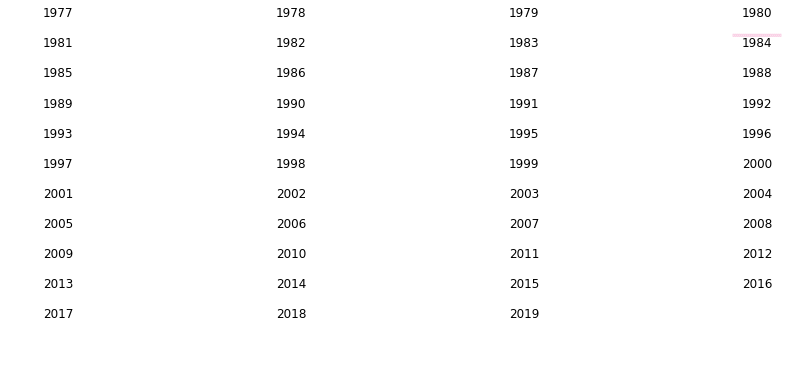

In [272]:
plt.rcParams['figure.figsize'] = [16, 6]

a = list(range(1977,2021))
year_num = []
for i in range(len(a)):
    year_num.append(str(a[i]))

# Create subplots for each year
for index, year in enumerate(data.columns):
    wc.generate(data_clean.report[index])
    plt.subplot(11, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(year_num[index])
    
plt.show() #这里的wordcloud画不出来，先看下topic model

In [276]:
data = pd.read_pickle('./dtm.pkl')
data

,152,190,1982,199,2004,2006,2007,202,2035,一下子,...,鼓吹,鼓舞,鼓舞人心,鼓舞斗志,鼓起,鼓足干劲,齐心协力,齐抓共管,龙头,龙头企业
1977,0,0,0,0,0,0,0,0,0,0,...,4,3,0,0,0,1,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1979,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0
1980,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1981,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0
1982,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,0,1,0


In [279]:
from gensim import matutils, models
import scipy.sparse

In [277]:
tdm = data.transpose()
tdm.head()

,1977,1978,1979,1980,1981,1982,1983,1984,1986,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [280]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [283]:
import pickle

In [2]:
cv = pickle.load(open("./cv_stop.pkl", "rb"))
cv

NameError: name 'pickle' is not defined

In [1]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
c = [1]*43

C:\Users\Abel\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


NameError: name 'cv' is not defined

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, passes=20)
lda.print_topics()

In [ ]:
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=id2word, time_slice=time_slice, num_topics=3)

In [290]:
from gensim import corpora, models, similarities
from gensim.models import LdaModel
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
import numpy
from gensim.matutils import hellinger

In [7]:
import pandas as pd
data = pd.read_pickle('./dtm.pkl')
from gensim import matutils, models
import scipy.sparse
import pickle

In [8]:
tdm = data.transpose()
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)
cv = pickle.load(open("./cv_stop.pkl", "rb"))#导入基本语料库
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [9]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, passes=100)
lda.print_topics() #这里给出了针对所有文档资料的topic

[(0,
  '0.025*"党员" + 0.018*"干部" + 0.017*"党组织" + 0.015*"领导" + 0.014*"整党" + 0.012*"党的建设" + 0.012*"组织" + 0.010*"党内" + 0.009*"思想" + 0.008*"作风"'),
 (1,
  '0.000*"发展" + 0.000*"经济" + 0.000*"社会" + 0.000*"中国" + 0.000*"改革" + 0.000*"制度" + 0.000*"同志" + 0.000*"国家" + 0.000*"我国" + 0.000*"完善"'),
 (2,
  '0.018*"同志" + 0.014*"发展" + 0.011*"经济" + 0.010*"历史" + 0.008*"我国" + 0.008*"毛泽东" + 0.008*"全国" + 0.007*"中国" + 0.007*"领导" + 0.007*"国家"'),
 (3,
  '0.000*"发展" + 0.000*"经济" + 0.000*"我国" + 0.000*"文化" + 0.000*"领导" + 0.000*"改革" + 0.000*"同志" + 0.000*"制度" + 0.000*"社会" + 0.000*"中国特色社会主义"'),
 (4,
  '0.000*"发展" + 0.000*"领导" + 0.000*"经济" + 0.000*"思想" + 0.000*"同志" + 0.000*"国家" + 0.000*"社会" + 0.000*"改革" + 0.000*"中国特色社会主义" + 0.000*"中国"'),
 (5,
  '0.026*"发展" + 0.008*"社会" + 0.008*"制度" + 0.007*"提高" + 0.007*"完善" + 0.006*"经济" + 0.006*"领导" + 0.005*"思想" + 0.005*"干部" + 0.005*"文化"'),
 (6,
  '0.000*"发展" + 0.000*"改革" + 0.000*"经济" + 0.000*"思想" + 0.000*"领导" + 0.000*"企业" + 0.000*"我国" + 0.000*"干部" + 0.000*"完善" + 0.000*"国家"'),
 (7,
  '0.0

In [10]:
from gensim import corpora, models, similarities
from gensim.models import LdaModel
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
import numpy
from gensim.matutils import hellinger

In [13]:
sparse_counts2 = scipy.sparse.csr_matrix(data)
corpus2 = matutils.Sparse2Corpus(sparse_counts2)

In [ ]:
c = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
time_slice = c
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus2, id2word=id2word, time_slice=time_slice, num_topics=3)